In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("gurgaon_missing_values_treated.csv")
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat       breez global hill view  sohna road   0.32   
3          flat  bestech park view sanskruti   sector 92   1.60   
4          flat               suncity avenue  sector 102   0.48   

   price_per_sqft  bedRoom  bathroom balcony  floorNum   agePossession  \
0          7585.0      3.0       2.0       2       2.0    New Property   
1          8600.0      2.0       2.0       2       4.0    New Property   
2          5470.0      2.0       2.0       1      17.0    New Property   
3          8020.0      3.0       4.0      3+      10.0  Relatively New   
4          9022.0      2.0       2.0       1       5.0  Relatively New   

   built_up_area  study room  servant room  store room  pooja room  others  \
0          850.0         0.0           0.0         0.0         0.0     0.0   
1         1226.0         1.0           1.0         0.0         0.0     0.0   
2         1000.0         0.0           0.0         0.0         0.0     0.0   
3         1615.0         0.0           1.0         0.0         0.0     1.0   
4          582.0         0.0           0.0         1.0         0.0     0.0   

   furnishing_type  luxury_score  
0              0.0           8.0  
1              0.0          38.0  
2              0.0          49.0  
3              1.0         174.0  
4              0.0         159.0

In [4]:
df.isna().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [5]:
df.shape

(3679, 18)

For the predictive modelling we don't ask the user the name of the society and price_per_sqft so temporarily we dropping these features.

In [6]:
temp_df = df.drop(columns=["society", "price_per_sqft"])

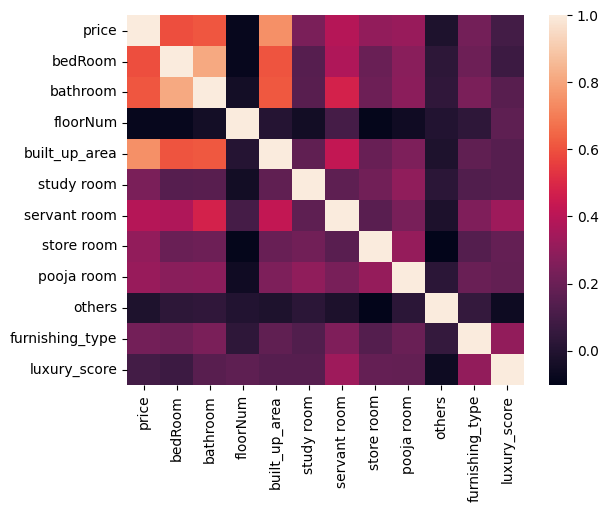

In [7]:
sns.heatmap(temp_df.corr());

In [8]:
temp_df.corr()["price"].sort_values(ascending=False)

price              1.000000
built_up_area      0.749569
bathroom           0.610862
bedRoom            0.591702
servant room       0.391156
pooja room         0.318752
store room         0.302291
study room         0.240007
furnishing_type    0.224834
luxury_score       0.093958
others            -0.016181
floorNum          -0.084333
Name: price, dtype: float64

#### luxury score and floornum columns are numeric, but we can convert this into the categorical columns 

### luxury score 

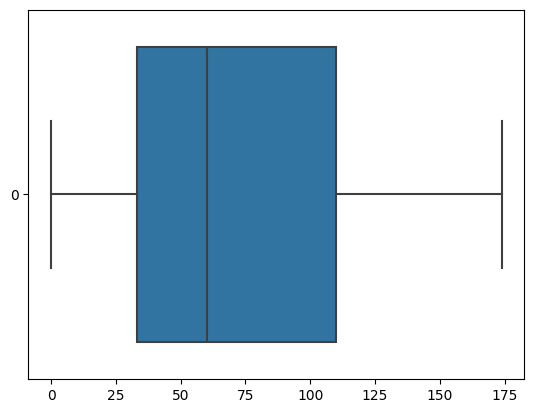

In [9]:
sns.boxplot(temp_df["luxury_score"], orient="h");

In [10]:
def convert_luxury_score(score):
    if 0 <= score < 50:
        return "Low"
    elif  50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None # if there is undefined in the column 

In [11]:
temp_df["luxury_score"].max()

174.0

In [12]:
temp_df["luxury_category"] = temp_df["luxury_score"].apply(convert_luxury_score)

### floorNum

<Axes: >

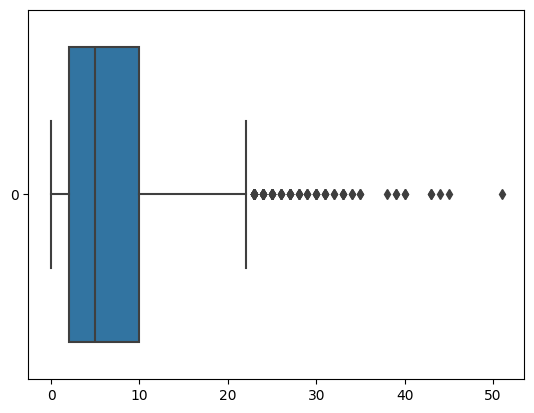

In [13]:
sns.boxplot(temp_df["floorNum"], orient="h")

In [14]:
def categorize_floor(floornum):
    if 0 <= floornum <= 2:
        return "Low Floor"
    elif 3 <= floornum <= 10:
        return "Mid Floor"
    elif 11 <= floornum <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [15]:
temp_df["floor_category"] = temp_df["floorNum"].apply(categorize_floor)

In [16]:
temp_df.columns

Index(['property_type', 'sector', 'price', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'agePossession', 'built_up_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score', 'luxury_category', 'floor_category'],
      dtype='object')

In [17]:
# drop the floornum and luxury_score columns 
temp_df.drop(columns=["floorNum", "luxury_score"], inplace=True)

In [18]:
# Converting the categorical feature values into numerical values (label encoding)
from sklearn.preprocessing import OrdinalEncoder

# make a copy of the original dataset to perform label encoding 
temp_df1 = temp_df.copy()

# get all the categorical features 
categorical_cols = temp_df.select_dtypes(include="object").columns

for col in categorical_cols:
    oe = OrdinalEncoder()
    temp_df1[col] = oe.fit_transform(temp_df1[[col]])
    print(oe.categories_)
    
# extract features and label 
X_label = temp_df1.drop("price", axis=1)
y_label = temp_df1["price"]

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [19]:
X_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    36.0      3.0       2.0      2.0            1.0   
1               0.0    95.0      2.0       2.0      2.0            1.0   
2               0.0   103.0      2.0       2.0      1.0            1.0   
3               0.0    99.0      3.0       4.0      4.0            3.0   
4               0.0     5.0      2.0       2.0      1.0            3.0   
5               0.0     1.0      4.0       4.0      4.0            1.0   
6               0.0    11.0      3.0       3.0      4.0            3.0   
7               0.0     5.0      3.0       4.0      3.0            3.0   
8               1.0     8.0      3.0       2.0      1.0            2.0   
9               1.0    29.0      3.0       3.0      2.0            0.0   
10              1.0    12.0      3.0       2.0      0.0            3.0   
11              0.0    31.0      2.0       2.0      2.0            3.0   
12              0.0    12.0      3.0       4.0      3.0            3.0   
13              0.0    67.0      4.0       4.0      4.0            3.0   
14              1.0    18.0      2.0       4.0      2.0            3.0   
15              0.0    99.0      3.0       4.0      3.0            3.0   
16              0.0    91.0      2.0       2.0      3.0            3.0   
17              0.0    75.0      2.0       2.0      3.0            1.0   
18              0.0    91.0      3.0       4.0      4.0            1.0   
19              0.0    33.0      2.0       2.0      1.0            2.0   
20              0.0    10.0      2.0       2.0      4.0            3.0   
21              0.0    32.0      2.0       2.0      3.0            4.0   
22              0.0    23.0      1.0       1.0      1.0            0.0   
23              1.0    43.0      8.0       5.0      4.0            2.0   
24              1.0    43.0      7.0       7.0      4.0            0.0   
25              0.0    31.0      4.0       2.0      4.0            2.0   
26              1.0    41.0      1.0       1.0      0.0            0.0   
27              1.0    12.0      4.0       4.0      4.0            1.0   
28              0.0    64.0      2.0       2.0      3.0            4.0   
29              1.0    49.0      6.0       6.0      3.0            0.0   
30              0.0    86.0      2.0       2.0      3.0            3.0   
31              0.0    67.0      3.0       3.0      3.0            4.0   
32              0.0    68.0      3.0       3.0      3.0            0.0   
33              1.0    95.0      2.0       2.0      2.0            1.0   
34              0.0    92.0      3.0       3.0      4.0            3.0   
35              1.0    48.0      4.0       4.0      4.0            3.0   
36              1.0    12.0      5.0       6.0      4.0            0.0   
37              0.0    52.0      4.0       4.0      3.0            3.0   
38              0.0    37.0      3.0       3.0      3.0            3.0   
39              0.0    15.0      2.0       2.0      2.0            3.0   
40              0.0    69.0      3.0       3.0      3.0            0.0   
41              1.0    31.0      4.0       3.0      3.0            2.0   
42              0.0    15.0      3.0       4.0      2.0            0.0   
43              0.0    17.0      3.0       3.0      4.0            3.0   
44              1.0    19.0      3.0       6.0      2.0            2.0   
45              0.0    63.0      3.0       2.0      3.0            4.0   
46              0.0    17.0      3.0       3.0      3.0            3.0   
47              0.0    72.0      3.0       3.0      1.0            3.0   
48              0.0    95.0      3.0       2.0      0.0            1.0   
49              0.0    70.0      3.0       4.0      3.0            1.0   
50              0.0    38.0      2.0       2.0      3.0            1.0   
51              0.0    87.0      2.0       2.0      2.0            3.0   
52              0.0    54.0      3.0       3.0      4.0            4.0   
53        

## Techniques for Feature Selection 

#### Note: As we used ordinal encoding, therfore using tree based models for the feature selection as they are more reliable when you do feature selection when you have used ordinal encoding.


### 1. Correlation Analysis

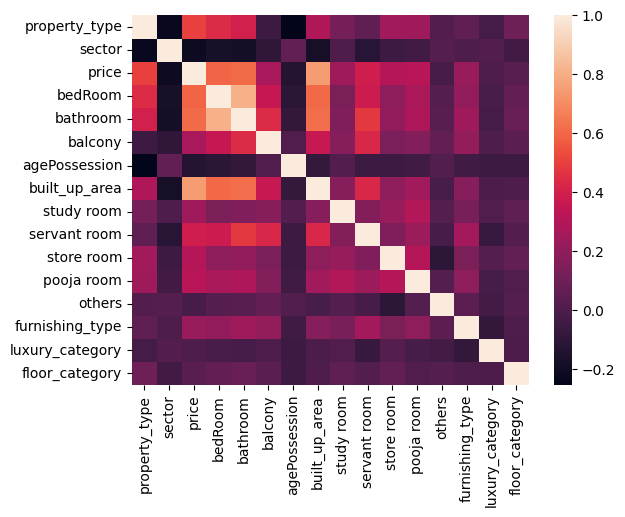

In [20]:
sns.heatmap(temp_df1.corr());

In [38]:
# correlation of price(output column) with other columns 
feature_importance_with_corr = temp_df1.corr()["price"].iloc[1:].reset_index().rename(columns={"index": "feature", "price": "corr_coef"}).sort_values(by="corr_coef", ascending=False)

feature_importance_with_corr

feature  corr_coef
1             price   1.000000
6     built_up_area   0.749569
3          bathroom   0.610862
2           bedRoom   0.591702
8      servant room   0.391156
10       pooja room   0.318752
9        store room   0.302291
4           balcony   0.270553
7        study room   0.240007
12  furnishing_type   0.224834
14   floor_category   0.040220
13  luxury_category   0.005224
11           others  -0.016181
5     agePossession  -0.131657
0            sector  -0.212359

### 2. Feature Importance with Random Forest 

In [39]:
from sklearn.ensemble import RandomForestRegressor

# train the random forest regressor on the label encoded data 
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_label, y_label)

# extract the features with there importance 
feature_importance_with_randomforest = pd.DataFrame({
    "feature": X_label.columns,
    "rf_importance": rf.feature_importances_
}).iloc[1:].sort_values(by="rf_importance", ascending=False)

feature_importance_with_randomforest

feature  rf_importance
6     built_up_area       0.651262
1            sector       0.102897
3          bathroom       0.024617
2           bedRoom       0.022981
8      servant room       0.019844
5     agePossession       0.014463
4           balcony       0.012734
12  furnishing_type       0.009444
7        study room       0.009404
9        store room       0.007150
13  luxury_category       0.006813
14   floor_category       0.006108
10       pooja room       0.005029
11           others       0.002719

### 3. Feature Importance with Gradient Boosting 

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_label, y_label)

feature_importance_with_gradientboosting = pd.DataFrame({
    "feature": X_label.columns,
    "gb_importance": gb.feature_importances_
}).iloc[1:].sort_values(by="gb_importance", ascending=False)

feature_importance_with_gradientboosting

feature  gb_importance
6     built_up_area       0.681847
1            sector       0.108043
2           bedRoom       0.036861
3          bathroom       0.032018
8      servant room       0.022566
9        store room       0.006965
7        study room       0.004217
5     agePossession       0.004159
12  furnishing_type       0.003643
4           balcony       0.001553
14   floor_category       0.000895
11           others       0.000301
13  luxury_category       0.000091
10       pooja room       0.000088

### 4. Permutation Importance ***
* It works by evaluating how much the model's performance degrades when the values of a specific feature are randomly shuffled while keeping other features intact(without shuffled). 
* Shuffled the feature one by one by keeping the other features unshuffled.
* he idea is that important features will cause a significant drop in model performance when their values are scrambled, while unimportant features will have a smaller impact.
* `Ranking Features`: After assessing all the features, you can rank them based on the magnitude of performance degradation. Features that cause a larger drop in model performance when shuffled are considered more important, while features with a smaller impact are considered less important.

In [41]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_label, 
                                                    y_label, 
                                                    test_size=0.2,
                                                    random_state=42)


# train the random forest regressor on the traning data 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Calculate the permutation importance 
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=42)

feature_importance_with_permutation = pd.DataFrame({
    "feature": X_label.columns,
    "perm_coef": perm_importance.importances_mean
}).iloc[1:].sort_values(by="perm_coef", ascending=False)

feature_importance_with_permutation

feature  perm_coef
6     built_up_area   0.735676
1            sector   0.181926
8      servant room   0.010922
3          bathroom   0.008697
5     agePossession   0.004771
13  luxury_category   0.002264
12  furnishing_type   0.002071
4           balcony   0.001849
2           bedRoom   0.001311
11           others   0.000034
7        study room  -0.000408
14   floor_category  -0.001112
10       pooja room  -0.001987
9        store room  -0.003404

### 5. Lasso 

In [42]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# scale down the data to same scale 
scalar = StandardScaler()
X_label_transformed = scalar.fit_transform(X_label)

# train a lasso regression model 
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_label_transformed, y_label)

feature_importance_with_lasso = pd.DataFrame({
    "feature": X_label.columns,
    "lasso_coef": lasso.coef_
}).iloc[1:].sort_values(by="lasso_coef", ascending=False)

feature_importance_with_lasso

feature  lasso_coef
6     built_up_area    1.507408
3          bathroom    0.273550
9        store room    0.193160
7        study room    0.165693
12  furnishing_type    0.159113
8      servant room    0.148250
10       pooja room    0.073971
13  luxury_category    0.051500
2           bedRoom    0.004368
5     agePossession   -0.000000
14   floor_category   -0.003037
11           others   -0.023408
4           balcony   -0.039085
1            sector   -0.073867

### 6. RFE (Recursive Feature Elimination) 

In [43]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

# apply rfe on the label encoded data 
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
# train the data 
selector_label = selector_label.fit(X_label, y_label)

# extract the selected features 
selected_features = X_label.columns[selector_label.support_]

# extract the coefficients for the selected features 
selected_coefficients = selector_label.estimator_.feature_importances_

feature_importance_with_rfe = pd.DataFrame({
    "feature": selected_features,
    "rfe_coef": selected_coefficients
}).iloc[1:].sort_values(by="rfe_coef", ascending=False)

feature_importance_with_rfe

feature  rfe_coef
6     built_up_area  0.649846
1            sector  0.100238
3          bathroom  0.025465
2           bedRoom  0.025381
8      servant room  0.019510
5     agePossession  0.015662
4           balcony  0.012199
12  furnishing_type  0.010627
7        study room  0.009401
9        store room  0.007617
10       pooja room  0.006671
13  luxury_category  0.006539
14   floor_category  0.005962
11           others  0.003284

### 7. Linear Regression Weights

In [45]:
# train the linear regression model 
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
# fit the data 
l_reg.fit(X_label_transformed, y_label)

feature_importance_with_linearRegression = pd.DataFrame({
    "feature": X_label.columns,
    "lr_coef": l_reg.coef_
}).iloc[1:].sort_values(by="lr_coef", ascending=False)

feature_importance_with_linearRegression

feature   lr_coef
6     built_up_area  1.509956
3          bathroom  0.280449
9        store room  0.197657
7        study room  0.173943
12  furnishing_type  0.168085
8      servant room  0.157349
10       pooja room  0.076991
13  luxury_category  0.062829
2           bedRoom  0.006859
5     agePossession -0.002065
14   floor_category -0.013903
11           others -0.031343
4           balcony -0.061997
1            sector -0.082963

### 8. SHAP 
* advanced technique 
* taked time to run 

In [29]:
import shap

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

array([0.46604361, 0.38432235, 0.05421442, 0.11570636, 0.04137746,
       0.02651405, 1.23753368, 0.01957614, 0.09536897, 0.01735423,
       0.00990321, 0.00670298, 0.02513367, 0.01541701, 0.02532741])

In [46]:
feature_importance_with_shap = pd.DataFrame({
    "feature": X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).iloc[1:].sort_values(by="SHAP_score", ascending=False)

feature_importance_with_shap

feature  SHAP_score
6     built_up_area    1.237534
1            sector    0.384322
3          bathroom    0.115706
8      servant room    0.095369
2           bedRoom    0.054214
4           balcony    0.041377
5     agePossession    0.026514
14   floor_category    0.025327
12  furnishing_type    0.025134
7        study room    0.019576
9        store room    0.017354
13  luxury_category    0.015417
10       pooja room    0.009903
11           others    0.006703

In [62]:
# merge all the dataframes that we got from the feature imortance 

final_feature_importance_df = feature_importance_with_corr.merge(feature_importance_with_randomforest, on="feature").merge(feature_importance_with_gradientboosting, on="feature").merge(feature_importance_with_permutation, on="feature").merge(feature_importance_with_lasso, on="feature").merge(feature_importance_with_rfe, on="feature").merge(feature_importance_with_linearRegression, on="feature").merge(feature_importance_with_shap, on="feature")

final_feature_importance_df

feature  corr_coef  rf_importance  gb_importance  perm_coef  \
0     built_up_area   0.749569       0.651262       0.681847   0.735676   
1          bathroom   0.610862       0.024617       0.032018   0.008697   
2           bedRoom   0.591702       0.022981       0.036861   0.001311   
3      servant room   0.391156       0.019844       0.022566   0.010922   
4        pooja room   0.318752       0.005029       0.000088  -0.001987   
5        store room   0.302291       0.007150       0.006965  -0.003404   
6           balcony   0.270553       0.012734       0.001553   0.001849   
7        study room   0.240007       0.009404       0.004217  -0.000408   
8   furnishing_type   0.224834       0.009444       0.003643   0.002071   
9    floor_category   0.040220       0.006108       0.000895  -0.001112   
10  luxury_category   0.005224       0.006813       0.000091   0.002264   
11           others  -0.016181       0.002719       0.000301   0.000034   
12    agePossession  -0.131657       0.014463       0.004159   0.004771   
13           sector  -0.212359       0.102897       0.108043   0.181926   

    lasso_coef  rfe_coef   lr_coef  SHAP_score  
0     1.507408  0.649846  1.509956    1.237534  
1     0.273550  0.025465  0.280449    0.115706  
2     0.004368  0.025381  0.006859    0.054214  
3     0.148250  0.019510  0.157349    0.095369  
4     0.073971  0.006671  0.076991    0.009903  
5     0.193160  0.007617  0.197657    0.017354  
6    -0.039085  0.012199 -0.061997    0.041377  
7     0.165693  0.009401  0.173943    0.019576  
8     0.159113  0.010627  0.168085    0.025134  
9    -0.003037  0.005962 -0.013903    0.025327  
10    0.051500  0.006539  0.062829    0.015417  
11   -0.023408  0.003284 -0.031343    0.006703  
12   -0.000000  0.015662 -0.002065    0.026514  
13   -0.073867  0.100238 -0.082963    0.384322

In [64]:
# normalize all the values 
numeric_columns = final_feature_importance_df.columns.difference(['feature'])
final_feature_importance_df[numeric_columns] = final_feature_importance_df[numeric_columns].div(final_feature_importance_df[numeric_columns].sum(axis=0), axis=1)

In [65]:
final_feature_importance_df

feature  corr_coef  rf_importance  gb_importance  perm_coef  \
0     built_up_area   0.221440       0.727290       0.754884   0.780468   
1          bathroom   0.180463       0.027491       0.035448   0.009226   
2           bedRoom   0.174803       0.025664       0.040809   0.001391   
3      servant room   0.115557       0.022161       0.024983   0.011587   
4        pooja room   0.094167       0.005616       0.000098  -0.002108   
5        store room   0.089304       0.007985       0.007711  -0.003611   
6           balcony   0.079928       0.014221       0.001720   0.001961   
7        study room   0.070904       0.010501       0.004669  -0.000433   
8   furnishing_type   0.066421       0.010546       0.004033   0.002197   
9    floor_category   0.011882       0.006821       0.000991  -0.001180   
10  luxury_category   0.001543       0.007608       0.000101   0.002402   
11           others  -0.004780       0.003036       0.000333   0.000036   
12    agePossession  -0.038895       0.016152       0.004605   0.005061   
13           sector  -0.062736       0.114909       0.119616   0.193003   

    lasso_coef  rfe_coef   lr_coef  SHAP_score  
0     0.618394  0.723335  0.618367    0.596559  
1     0.112220  0.028345  0.114851    0.055777  
2     0.001792  0.028251  0.002809    0.026134  
3     0.060818  0.021716  0.064439    0.045973  
4     0.030346  0.007426  0.031530    0.004774  
5     0.079241  0.008478  0.080946    0.008366  
6    -0.016034  0.013579 -0.025390    0.019946  
7     0.067974  0.010464  0.071234    0.009437  
8     0.065274  0.011829  0.068835    0.012116  
9    -0.001246  0.006636 -0.005694    0.012209  
10    0.021127  0.007279  0.025730    0.007432  
11   -0.009603  0.003655 -0.012836    0.003231  
12   -0.000000  0.017433 -0.000846    0.012781  
13   -0.030303  0.111574 -0.033975    0.185265

In [79]:
# get the mean value for each of the feature importance 
mean_values = final_feature_importance_df[['rf_importance','gb_importance','perm_coef','rfe_coef','SHAP_score']]\
.mean(axis=1).sort_values(ascending=False)

result_df = pd.DataFrame({'Feature': final_feature_importance_df['feature'], 
                          'Mean_Value': mean_values}).sort_values(by="Mean_Value", ascending=False)

result_df

Feature  Mean_Value
0     built_up_area    0.716507
13           sector    0.144873
1          bathroom    0.031257
3      servant room    0.025284
2           bedRoom    0.024450
12    agePossession    0.011207
6           balcony    0.010285
8   furnishing_type    0.008144
7        study room    0.006928
5        store room    0.005786
9    floor_category    0.005095
10  luxury_category    0.004964
4        pooja room    0.003161
11           others    0.002058

In [80]:
X_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    36.0      3.0       2.0      2.0            1.0   
1               0.0    95.0      2.0       2.0      2.0            1.0   
2               0.0   103.0      2.0       2.0      1.0            1.0   
3               0.0    99.0      3.0       4.0      4.0            3.0   
4               0.0     5.0      2.0       2.0      1.0            3.0   
5               0.0     1.0      4.0       4.0      4.0            1.0   
6               0.0    11.0      3.0       3.0      4.0            3.0   
7               0.0     5.0      3.0       4.0      3.0            3.0   
8               1.0     8.0      3.0       2.0      1.0            2.0   
9               1.0    29.0      3.0       3.0      2.0            0.0   
10              1.0    12.0      3.0       2.0      0.0            3.0   
11              0.0    31.0      2.0       2.0      2.0            3.0   
12              0.0    12.0      3.0       4.0      3.0            3.0   
13              0.0    67.0      4.0       4.0      4.0            3.0   
14              1.0    18.0      2.0       4.0      2.0            3.0   
15              0.0    99.0      3.0       4.0      3.0            3.0   
16              0.0    91.0      2.0       2.0      3.0            3.0   
17              0.0    75.0      2.0       2.0      3.0            1.0   
18              0.0    91.0      3.0       4.0      4.0            1.0   
19              0.0    33.0      2.0       2.0      1.0            2.0   
20              0.0    10.0      2.0       2.0      4.0            3.0   
21              0.0    32.0      2.0       2.0      3.0            4.0   
22              0.0    23.0      1.0       1.0      1.0            0.0   
23              1.0    43.0      8.0       5.0      4.0            2.0   
24              1.0    43.0      7.0       7.0      4.0            0.0   
25              0.0    31.0      4.0       2.0      4.0            2.0   
26              1.0    41.0      1.0       1.0      0.0            0.0   
27              1.0    12.0      4.0       4.0      4.0            1.0   
28              0.0    64.0      2.0       2.0      3.0            4.0   
29              1.0    49.0      6.0       6.0      3.0            0.0   
30              0.0    86.0      2.0       2.0      3.0            3.0   
31              0.0    67.0      3.0       3.0      3.0            4.0   
32              0.0    68.0      3.0       3.0      3.0            0.0   
33              1.0    95.0      2.0       2.0      2.0            1.0   
34              0.0    92.0      3.0       3.0      4.0            3.0   
35              1.0    48.0      4.0       4.0      4.0            3.0   
36              1.0    12.0      5.0       6.0      4.0            0.0   
37              0.0    52.0      4.0       4.0      3.0            3.0   
38              0.0    37.0      3.0       3.0      3.0            3.0   
39              0.0    15.0      2.0       2.0      2.0            3.0   
40              0.0    69.0      3.0       3.0      3.0            0.0   
41              1.0    31.0      4.0       3.0      3.0            2.0   
42              0.0    15.0      3.0       4.0      2.0            0.0   
43              0.0    17.0      3.0       3.0      4.0            3.0   
44              1.0    19.0      3.0       6.0      2.0            2.0   
45              0.0    63.0      3.0       2.0      3.0            4.0   
46              0.0    17.0      3.0       3.0      3.0            3.0   
47              0.0    72.0      3.0       3.0      1.0            3.0   
48              0.0    95.0      3.0       2.0      0.0            1.0   
49              0.0    70.0      3.0       4.0      3.0            1.0   
50              0.0    38.0      2.0       2.0      3.0            1.0   
51              0.0    87.0      2.0       2.0      2.0            3.0   
52              0.0    54.0      3.0       3.0      4.0            4.0   
53        

In [83]:
# consider all features 
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

scores_with_all_columns = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')
scores_with_all_columns.mean()

0.8158448839569499

In [88]:
# drop the study room, pooja room, others
scores = cross_val_score(rf, X_label.drop(columns=["study room", "pooja room", "others"]), y_label, cv=5, scoring="r2")
scores.mean()

0.8135097580738433

In [89]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [91]:
export_df.head()

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0            0.0    36.0      3.0       2.0      2.0            1.0   
1            0.0    95.0      2.0       2.0      2.0            1.0   
2            0.0   103.0      2.0       2.0      1.0            1.0   
3            0.0    99.0      3.0       4.0      4.0            3.0   
4            0.0     5.0      2.0       2.0      1.0            3.0   

   built_up_area  servant room  store room  furnishing_type  luxury_category  \
0          850.0           0.0         0.0              0.0              1.0   
1         1226.0           1.0         0.0              0.0              1.0   
2         1000.0           0.0         0.0              0.0              1.0   
3         1615.0           1.0         0.0              1.0              0.0   
4          582.0           0.0         1.0              0.0              0.0   

   floor_category  price  
0             1.0   0.82  
1             2.0   0.95  
2             0.0   0.32  
3             2.0   1.60  
4             2.0   0.48

In [92]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)